## A taste of Data Analytics
Masterclass by Violeta Mezeklieva in collaboration with AllWomen.tech

The dataset we will be using comes from the UCI repository: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

And if you are interested in further opportunities with this dataset, you can read the following research paper: http://www.math-evry.cnrs.fr/_media/members/aguilloux/enseignements/moro2016.pdf 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset_Facebook.csv', sep = ',')

In [3]:
dataset.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,1,12,1,1,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,0.0,100
1,139441,Status,1,12,1,1,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,0.0,164
2,139441,Photo,1,12,1,1,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,0.0,80
3,139441,Photo,1,12,1,1,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,0.0,1777
4,139441,Photo,1,12,1,2,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,0.0,393


### What do the labels mean?

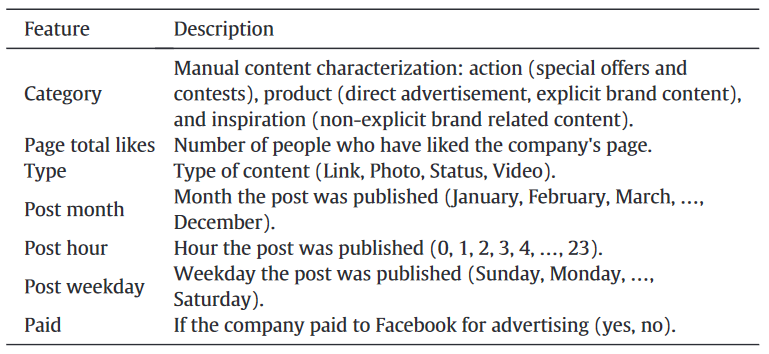

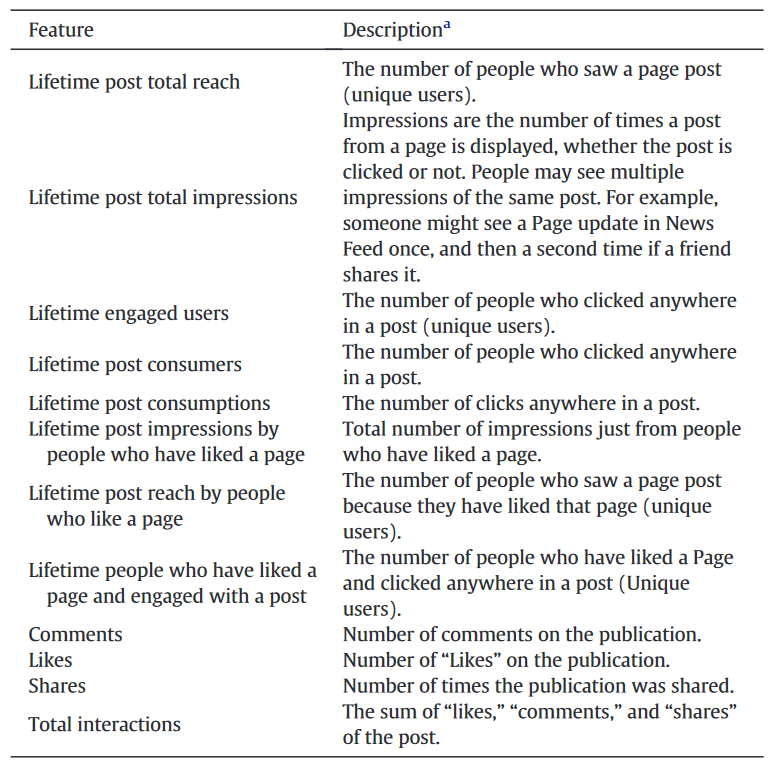

In [4]:
dataset.shape

(500, 19)

In [5]:
dataset.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


On average, what percentage of this company's Facebook followers see a post? 

In [11]:
(13903 / 123194) * 100

11.28545221358183

On average, what percentage of this company's Facebook followers interacts with the posts?

In [34]:
(212 / 13903) * 100

1.5248507516363374

What does this company post about?

In [37]:
dataset.Category.value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

In [6]:
#rename the values in the Category column with the description
dataset.Category.replace([1,2,3],['action', 'product', 'inspiration'],inplace=True)

In [7]:
dataset.Category.value_counts()

action         215
inspiration    155
product        130
Name: Category, dtype: int64

Which post Category do users have most interaction with?

In [13]:
dataset.groupby('Category')['Total Interactions'].sum()

Category
action         45606
inspiration    30611
product        29843
Name: Total Interactions, dtype: int64

What type of posts does it post?

In [83]:
dataset.Type.value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

<AxesSubplot:>

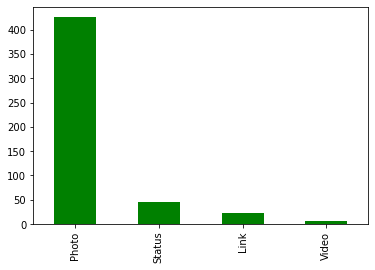

In [14]:
dataset.Type.value_counts().plot(kind='bar',color='green')

<AxesSubplot:xlabel='Type', ylabel='Count'>

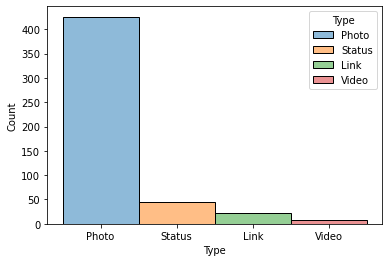

In [117]:
sns.histplot(data = dataset, x = 'Type', hue = 'Type')

<AxesSubplot:xlabel='Type', ylabel='count'>

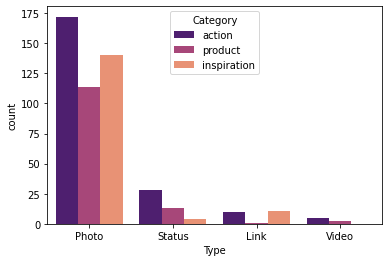

In [136]:
sns.countplot(x = 'Type', hue = 'Category', data = dataset, palette = 'magma')

Which Type of post receives most interaction?

In [118]:
dataset.groupby('Type')['Total Interactions'].sum()

Type
Link       1959
Photo     92263
Status     9767
Video      2071
Name: Total Interactions, dtype: int64

Text(0.5, 1.0, 'Which Type of post received the most interaction?')

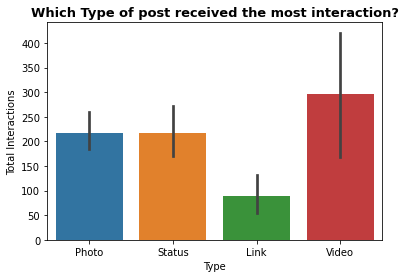

In [133]:
sns.barplot(data = dataset, 
            x = 'Type', 
            y = 'Total Interactions').set_title('Which Type of post received the most interaction?',
                                                fontdict= { 'fontsize': 13, 'fontweight':'bold'})

What is the daily posting behaviour of this company?

Text(0.5, 1.0, 'Posting behaviour per hour')

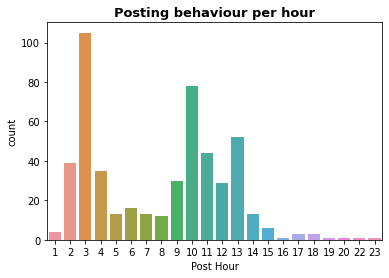

In [145]:
sns.countplot(data = dataset, x ='Post Hour').set_title('Posting behaviour per hour', 
                                                        fontdict= { 'fontsize': 13, 'fontweight':'bold'})

What is the posting behaviour per month?


Text(0.5, 1.0, 'Posting behaviour per month')

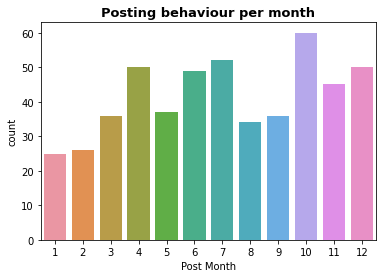

In [150]:
sns.countplot(data=dataset, x = 'Post Month').set_title('Posting behaviour per month',
                                                        fontdict= { 'fontsize': 13, 'fontweight':'bold'})

What is the proportion of paid vs unpaid advertising over the year?

Text(0.5, 1.0, 'Paid vs Unpaid posts over the year')

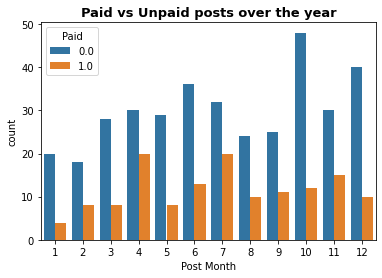

In [151]:
sns.countplot(data = dataset, x='Post Month', hue = 'Paid').set_title('Paid vs Unpaid advertising over the year',
                                                                      fontdict= { 'fontsize': 13, 'fontweight':'bold'})

On average, did users engage more with paid advertising than without?

In [153]:
dataset.groupby('Paid')['Total Interactions'].median()

Paid
0.0    117
1.0    158
Name: Total Interactions, dtype: int64

<AxesSubplot:xlabel='Post Month', ylabel='like'>

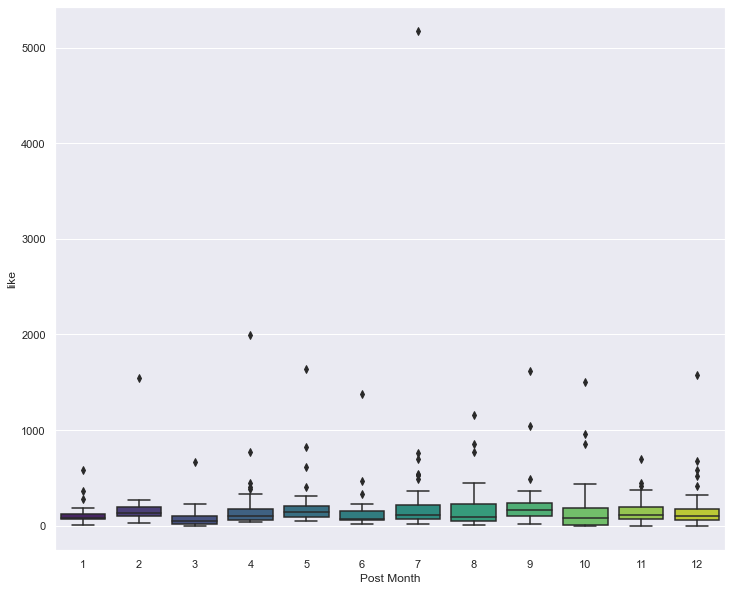

In [237]:
sns.boxplot(data = dataset, x='Post Month',y='like',palette='viridis')

<AxesSubplot:xlabel='Post Month', ylabel='like'>

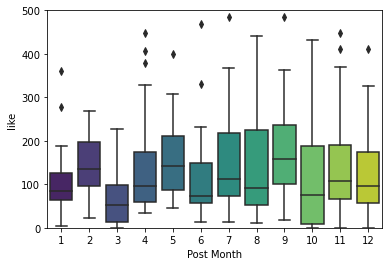

In [15]:
plt.ylim(0, 500)
sns.boxplot(data = dataset,x='Post Month',y='like',palette='viridis')

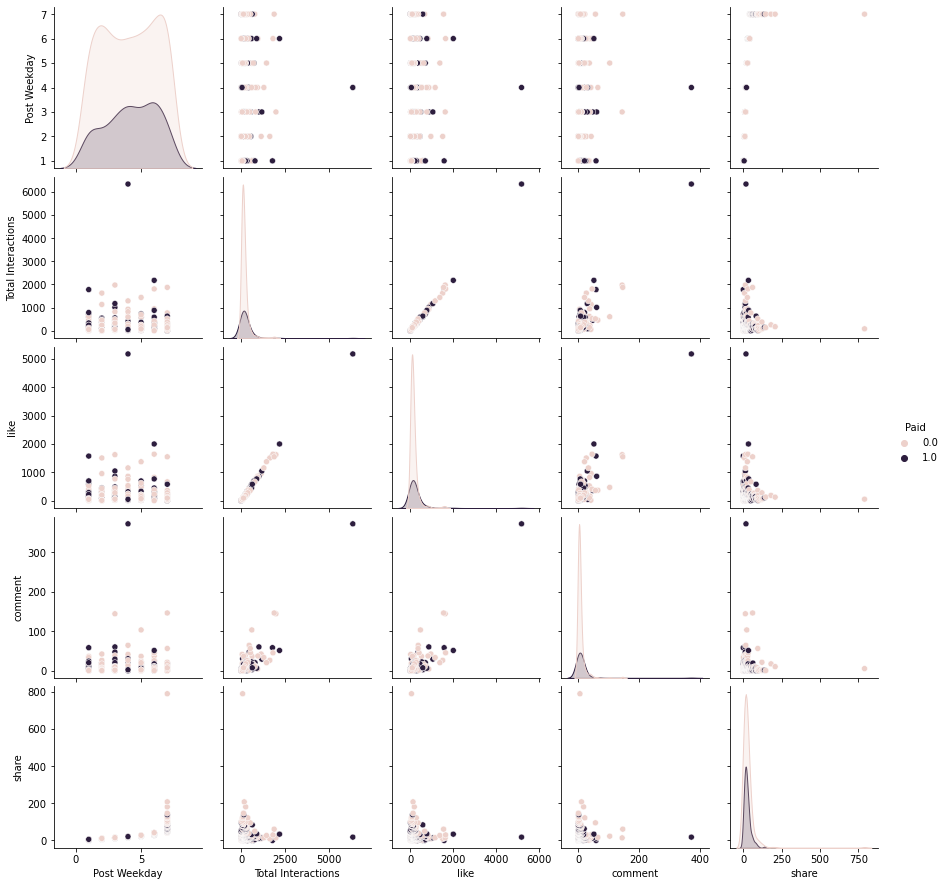

In [224]:
sns.pairplot(data = dataset[['Post Weekday', 'Total Interactions', 'Paid', 'like', 'comment', 'share']],
             hue="Paid")

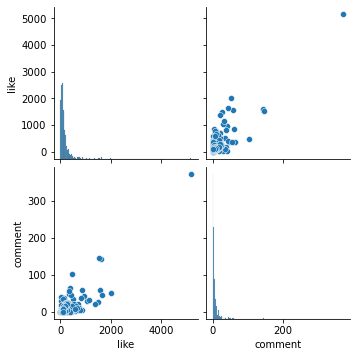

In [230]:
sns.pairplot(data= dataset[['like','comment']])

<AxesSubplot:>

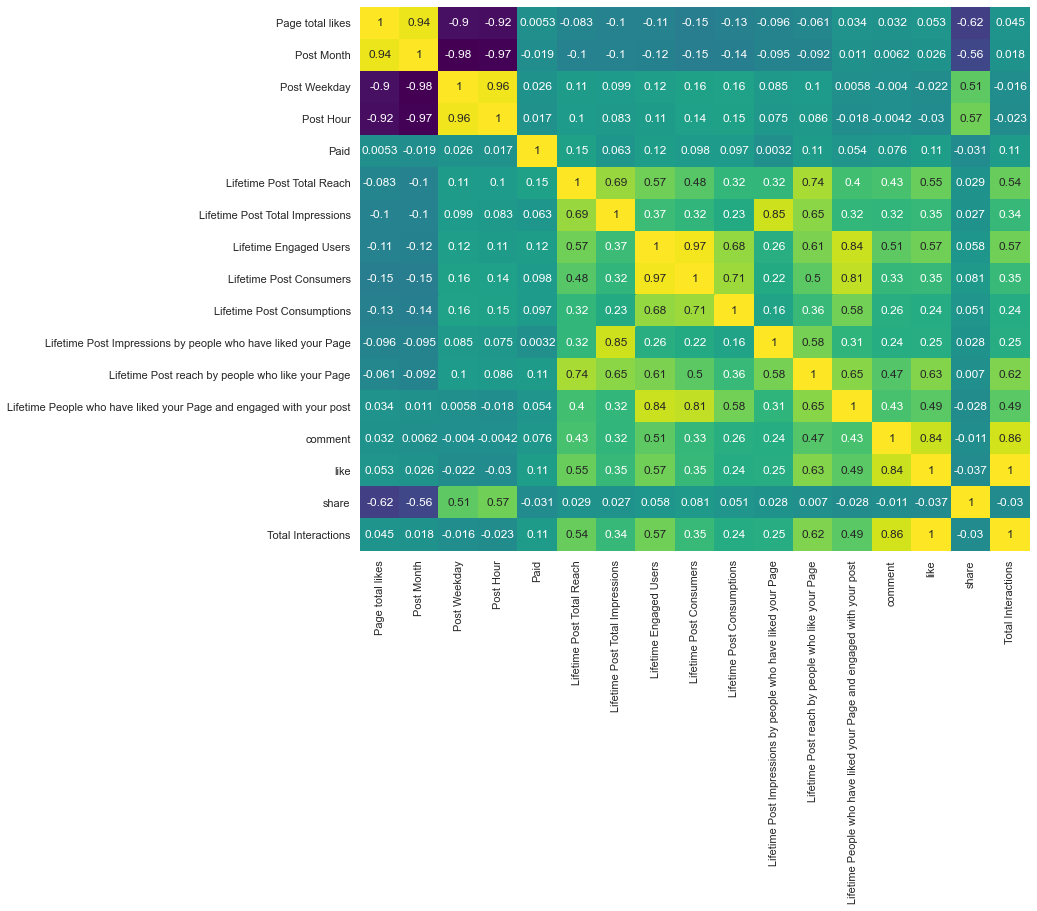

In [236]:
sns.set(rc={"figure.figsize":(12, 10)})
sns.heatmap(dataset.corr(),cmap='viridis',annot=True,cbar=False)

Let's try to understand why engagement was low despite using paid advertising.

In [181]:
#we take the values 25% below the mean of paid posts 
dataset[(dataset['Lifetime Engaged Users'] < 393) & (dataset['Paid']==0)]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,action,12,1,1,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,0.0,100
2,139441,Photo,action,12,1,1,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,0.0,80
9,139441,Photo,action,12,1,2,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,0.0,142
11,139441,Photo,action,12,1,2,0.0,3112,5590,208,127,145,3887,2174,165,0,88.0,0.0,106
12,139441,Photo,action,12,1,2,0.0,2847,5133,193,115,133,3779,2072,152,0,90.0,0.0,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,100732,Link,inspiration,3,7,13,0.0,2933,5144,24,23,26,3972,2012,19,0,6.0,44.0,6
431,100732,Photo,inspiration,3,7,13,0.0,4094,7469,206,203,1420,7451,4088,200,0,4.0,45.0,4
432,100732,Photo,inspiration,3,7,13,0.0,452,726,186,184,889,721,450,114,0,4.0,46.0,5
438,98195,Link,inspiration,3,7,13,0.0,5730,10083,103,71,97,8964,4830,92,2,32.0,47.0,49


In [247]:
low = dataset[(dataset['Lifetime Engaged Users'] < 393) & (dataset['Paid']==0)]